# Project

## Project Name : Wine quality prediction
## 1.Data collection:
## Import Libraries and Load DataSet¶


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.float=float
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
df=pd.read_csv('C:/Users/user/Downloads/kaggle/WineQT.csv')
df.head(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,NaN,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,8,7.8,0.00,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


## 2.Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1143 non-null   int64  
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1141 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1140 non-null   float64
 6   free sulfur dioxide   1143 non-null   float64
 7   total sulfur dioxide  1143 non-null   float64
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   int64  
 13  Id                    1143 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 125.1 KB


In [4]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1141.000000,1143.000000,1143.000000,1140.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,571.000000,8.311111,0.530923,0.268364,2.532152,0.086929,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,330.099985,1.747595,0.180226,0.196686,1.355917,0.047329,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,0.000000,4.600000,0.000000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,285.500000,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,571.000000,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,856.500000,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,1142.000000,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
df.head(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,NaN,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,8,7.8,0.00,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [6]:
df.tail(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1133,1133,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,1584
1134,1134,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,1586
1135,1135,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6,1587
1136,1136,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,1590
1137,1137,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,1591
1138,1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [7]:
df.shape

(1143, 14)

In [8]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        2
citric acid             0
residual sugar          0
chlorides               3
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Id'],
      dtype='object')

## Aggregaion functions

In [10]:
df['alcohol'].mean()

10.442111402741325

In [11]:
df['alcohol'].median()

10.2

In [12]:
df['alcohol'].mode()

0    9.5
Name: alcohol, dtype: float64

In [13]:
df['residual sugar'].max()

15.5

In [14]:
df['fixed acidity'].std()

1.747595017169539

In [15]:
df['total sulfur dioxide'].sum()

52480.5

In [16]:
df['chlorides'].agg(['mean','median','max','min','std','sum'])

mean       0.086929
median     0.079000
max        0.611000
min        0.012000
std        0.047329
sum       99.099000
Name: chlorides, dtype: float64

In [17]:
d=df['residual sugar']+df['chlorides']
d

0       1.976
1       2.698
2         NaN
3       1.975
4       1.976
        ...  
1138    2.376
1139    1.968
1140    2.090
1141    2.262
1142    2.075
Length: 1143, dtype: float64

In [18]:
df['chlorides']=(list(map(lambda x:x+1,df['chlorides'])))
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0,7.4,0.700,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.00,2.6,1.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,2,7.8,0.760,0.04,2.3,NaN,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,3,11.2,0.280,0.56,1.9,1.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,4,7.4,0.700,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1138,6.3,0.510,0.13,2.3,1.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,1139,6.8,0.620,0.08,1.9,1.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,1140,6.2,0.600,0.08,2.0,1.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,1141,5.9,0.550,0.10,2.2,1.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [19]:
from functools import reduce
r=reduce(lambda x,y: x+y,df['Id'])
r

920080

## 3.Data Preprocesing and cleaning

In [20]:
#preprocesing
# adding column
df['total_acidity']=df['fixed acidity']+df['volatile acidity']+df['citric acid']
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,total_acidity
0,0,7.4,0.700,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,8.100
1,1,7.8,0.880,0.00,2.6,1.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,8.680
2,2,7.8,0.760,0.04,2.3,NaN,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,8.600
3,3,11.2,0.280,0.56,1.9,1.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,12.040
4,4,7.4,0.700,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,8.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1138,6.3,0.510,0.13,2.3,1.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,6.940
1139,1139,6.8,0.620,0.08,1.9,1.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,7.500
1140,1140,6.2,0.600,0.08,2.0,1.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,6.880
1141,1141,5.9,0.550,0.10,2.2,1.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,6.550


In [21]:
df['lable quality']=df['quality'].apply(lambda x:'Low' if x<=3 else ('Medium' if x<=6 else 'High')) 
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,total_acidity,lable quality
0,0,7.4,0.700,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,8.100,Medium
1,1,7.8,0.880,0.00,2.6,1.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,8.680,Medium
2,2,7.8,0.760,0.04,2.3,NaN,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,8.600,Medium
3,3,11.2,0.280,0.56,1.9,1.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,12.040,Medium
4,4,7.4,0.700,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,8.100,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1138,6.3,0.510,0.13,2.3,1.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,6.940,Medium
1139,1139,6.8,0.620,0.08,1.9,1.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,7.500,Medium
1140,1140,6.2,0.600,0.08,2.0,1.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,6.880,Medium
1141,1141,5.9,0.550,0.10,2.2,1.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,6.550,Medium


In [22]:
# adding row
df.loc[len(df)]=[4,7.4,0.700,0.00,1.9,2.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,8.100,'Medium']
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,total_acidity,lable quality
0,0,7.4,0.700,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,8.100,Medium
1,1,7.8,0.880,0.00,2.6,1.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,8.680,Medium
2,2,7.8,0.760,0.04,2.3,NaN,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,8.600,Medium
3,3,11.2,0.280,0.56,1.9,1.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,12.040,Medium
4,4,7.4,0.700,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,8.100,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1139,6.8,0.620,0.08,1.9,1.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,7.500,Medium
1140,1140,6.2,0.600,0.08,2.0,1.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,6.880,Medium
1141,1141,5.9,0.550,0.10,2.2,1.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,6.550,Medium
1142,1142,5.9,0.645,0.12,2.0,1.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597,6.665,Medium


In [23]:
# droping volatile acidity column
df=df.drop('volatile acidity',axis=1)
df


,Unnamed: 0,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,total_acidity,lable quality
0,0,7.4,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,8.100,Medium
1,1,7.8,0.00,2.6,1.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,8.680,Medium
2,2,7.8,0.04,2.3,NaN,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,8.600,Medium
3,3,11.2,0.56,1.9,1.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,12.040,Medium
4,4,7.4,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,8.100,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1139,6.8,0.08,1.9,1.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,7.500,Medium
1140,1140,6.2,0.08,2.0,1.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,6.880,Medium
1141,1141,5.9,0.10,2.2,1.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,6.550,Medium
1142,1142,5.9,0.12,2.0,1.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597,6.665,Medium


In [24]:
# droping null values
df.dropna()

,Unnamed: 0,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,total_acidity,lable quality
0,0,7.4,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,8.100,Medium
1,1,7.8,0.00,2.6,1.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,8.680,Medium
3,3,11.2,0.56,1.9,1.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,12.040,Medium
4,4,7.4,0.00,1.9,1.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,8.100,Medium
5,5,7.4,0.00,1.8,1.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,5,8.060,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1139,6.8,0.08,1.9,1.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,7.500,Medium
1140,1140,6.2,0.08,2.0,1.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,6.880,Medium
1141,1141,5.9,0.10,2.2,1.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,6.550,Medium
1142,1142,5.9,0.12,2.0,1.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597,6.665,Medium


In [25]:
# value counts
a=df[['alcohol','residual sugar']].value_counts()
a

alcohol  residual sugar
9.5      1.8               12
9.4      2.0               11
9.5      2.1               10
         1.9               10
9.8      2.2               10
                           ..
10.5     1.6                1
10.4     5.1                1
         3.1                1
         3.0                1
14.9     7.5                1
Name: count, Length: 548, dtype: int64

In [26]:
counts=df['quality'].value_counts()
counts

quality
5    484
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [27]:
# cleaning
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
citric acid             0
residual sugar          0
chlorides               3
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
total_acidity           2
lable quality           0
dtype: int64

In [28]:
mean=df['chlorides'].mean()
df['chlorides']=df['chlorides'].fillna(mean)
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
total_acidity           2
lable quality           0
dtype: int64

In [29]:
median=df['total_acidity'].median()
df['total_acidity']=df['total_acidity'].fillna(median)
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
total_acidity           0
lable quality           0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e09808a120>,
 'caps': [<matplotlib.lines.Line2D at 0x1e09808a6c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e097fd2d20>],
 'medians': [<matplotlib.lines.Line2D at 0x1e09808ac00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e09808af00>],
 'means': []}

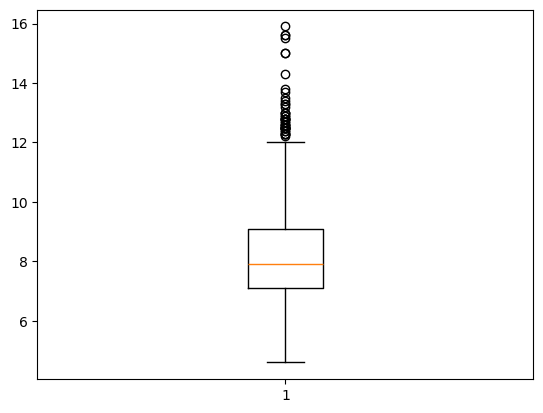

In [30]:
#handling outliers
plt.boxplot(df['fixed acidity'])

<Axes: >

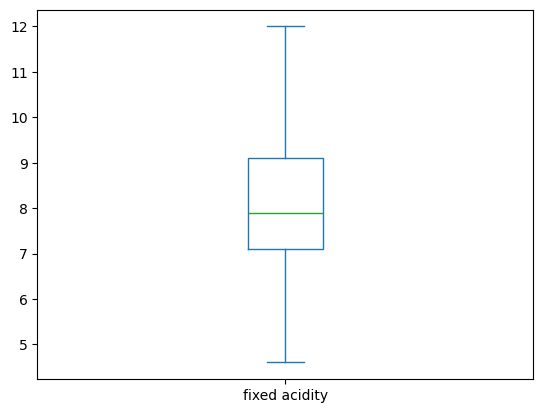

In [31]:
Q1=df['fixed acidity'].quantile(0.25)
Q3=df['fixed acidity'].quantile(0.75)
iqr=Q3-Q1
lower_bound=Q1-1.5*iqr
upper_bound=Q3+1.5*iqr

fare_arr=df['fixed acidity']
lower_cap=0
upper_cap=10
for i in df['fixed acidity']:
    if i < lower_bound:
        df['fixed acidity']=df['fixed acidity'].replace(i,lower_cap)
    elif i > upper_bound:
        df['fixed acidity']=df['fixed acidity'].replace(i,upper_cap)
df['fixed acidity'].plot(kind='box')

<Axes: >

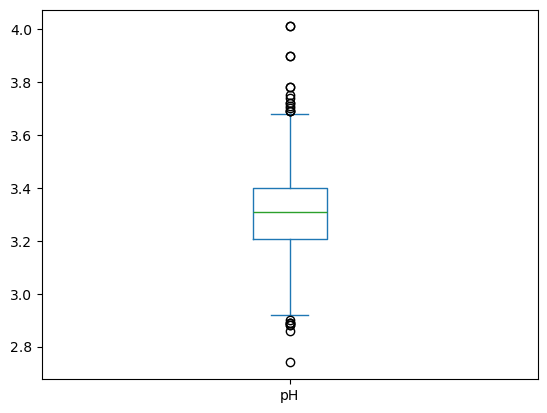

In [32]:
df['pH'].plot(kind='box')

<Axes: >

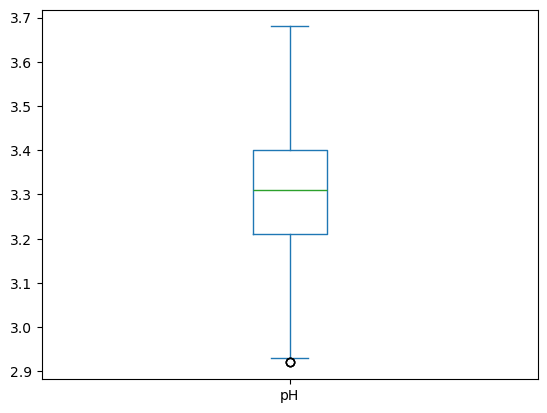

In [33]:
Q1=df['pH'].quantile(0.25)
Q3=df['pH'].quantile(0.75)
iqr=Q3-Q1
lower_bound=Q1-1.5*iqr
upper_bound=Q3+1.5*iqr
df_no_outliers = df[(df['pH'] >= lower_bound) & (df['pH'] <= upper_bound)]
# Optional: plot the cleaned data
df_no_outliers['pH'].plot(kind='box')

## 4.Data visuvalization 

Text(0, 0.5, 'counts')

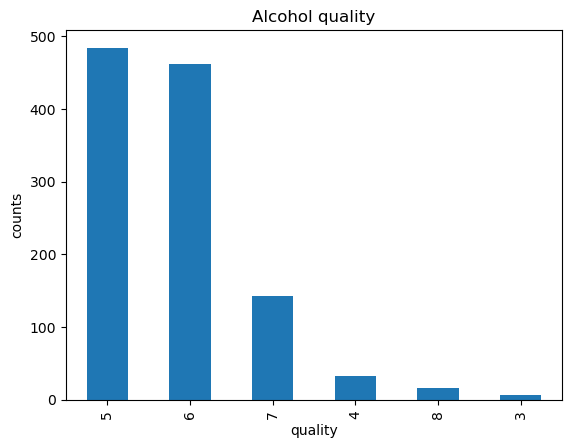

In [34]:
#Alcohol quality count
counts.plot(kind='bar')
plt.title('Alcohol quality')
plt.xlabel('quality')
plt.ylabel('counts')

<Axes: xlabel='quality'>

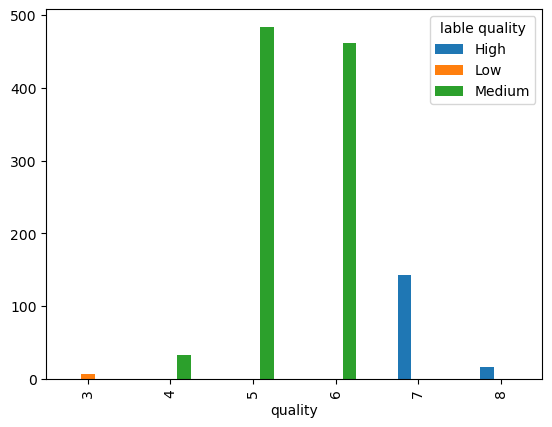

In [35]:
b=df[['quality','lable quality']].value_counts().unstack()
b.plot(kind='bar')

Text(0.5, 0, 'chlorides')

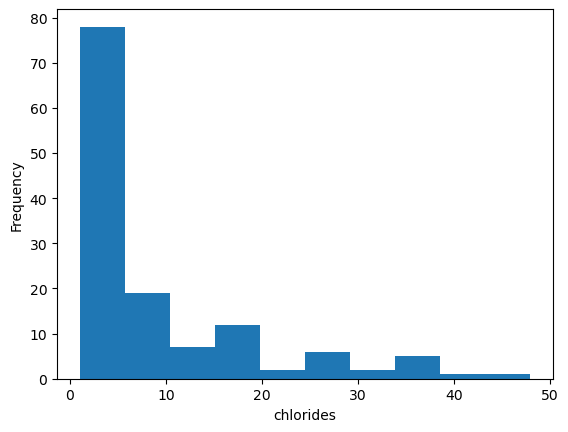

In [36]:
c=(df['chlorides'].value_counts())
c.plot(kind='hist')
plt.xlabel('chlorides')

Text(0, 0.5, 'residual sugar')

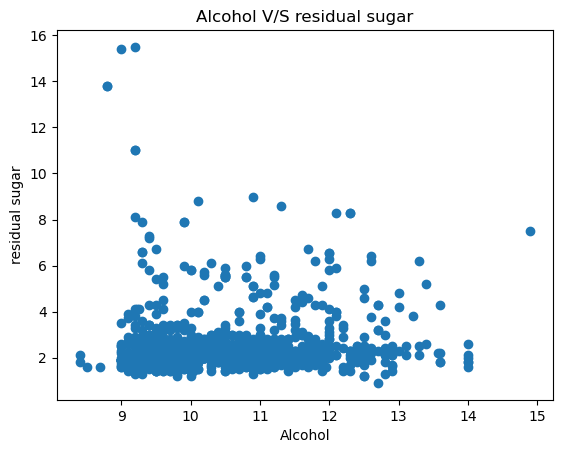

In [37]:
plt.scatter(df['alcohol'],df['residual sugar'])
plt.title("Alcohol V/S residual sugar")
plt.xlabel('Alcohol')
plt.ylabel('residual sugar')

Text(0, 0.5, 'pH')

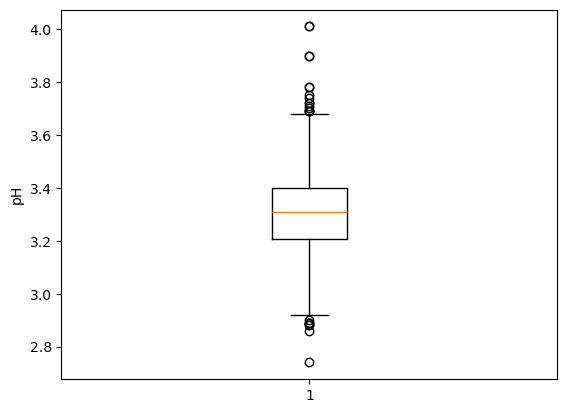

In [38]:
plt.boxplot(df['pH'])
plt.ylabel('pH')

Text(0, 0.5, 'alcohol')

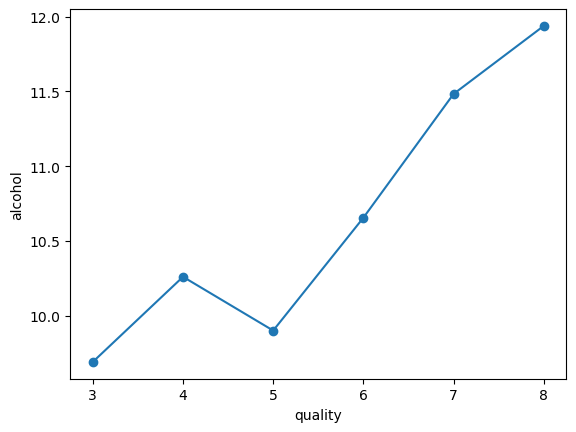

In [39]:
data=df.groupby('quality')['alcohol'].mean()
data.plot(kind='line',marker='o')
plt.xlabel('quality')
plt.ylabel('alcohol')

<Axes: xlabel='quality'>

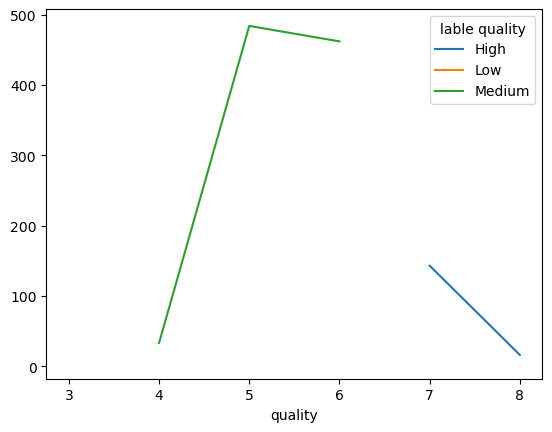

In [40]:
b=df[['quality','lable quality']].value_counts().unstack()
b.plot(kind='line')

<Axes: ylabel='count'>

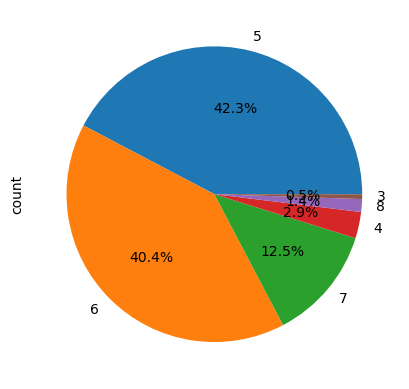

In [41]:
data=(df['quality'].value_counts())
data.plot(kind='pie',autopct='%1.1f%%')

In [49]:
df.drop('lable quality',axis=1,inplace=True)

## 5.Data Training and Testing

In [50]:
y=df['quality']
x=df.drop('quality',axis=1)

In [51]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
total_acidity           0
dtype: int64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [53]:
x_train.shape,x_test.shape

((915, 13), (229, 13))

In [54]:
y_train.shape,y_test.shape

((915,), (229,))

In [55]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [56]:
y_pred=model.predict(x_test)
df=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

In [57]:
print(mean_squared_error(y_test,y_pred))

0.40048982815852086
